<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/03-Agrupamiento-Jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento Jerarquico
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Alisson Manosalvas &bull; 14 Dic 2025
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [41]:
# Paquetes necesarios
import pandas as pd # Para manejo de datos
import matplotlib.pyplot as plt # Para visualización
import numpy as np # Para manejo de arreglos
import plotly.express as px # Para visualización
from scipy.spatial.distance import cdist # Para cálculo de distancias
# Modelo de clustering jerárquico
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
# Estandarización de datos
from sklearn.preprocessing import StandardScaler
# Para PCA
from sklearn.decomposition import PCA

---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

- **Mostrar algunos datos**

In [49]:
# El dataset se lo puede encontrar también en: https://github.com/aliss153/Aprendizaje-Automatico/blob/main/Country-data.csv

In [4]:
df = pd.read_csv("Country-data.csv")
df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


**- Mostrar una descripción de los datos.**

In [10]:
dict_df = pd.read_csv("data-dictionary.csv")
dict_df

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


**- Escalar los datos si es necesario.**

In [14]:
numeric_cols = df.drop(columns=['country']).columns
numeric_cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [19]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[numeric_cols])
df_scaled = pd.DataFrame(scaled_values, columns=numeric_cols)
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


---
## <font color='264CC7'> Dendograma </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Genera el dendograma de los datos.
<ul>
  <li>Usa diferentes métricas y funciones de enlace.</li>
  <li>Toma una distancia de corte.</li>
  <li>De manera intutiva, ¿por qué tomaste la métrica y la distancia de corte?</li>
</ul>
</div>

**- Usa diferentes métricas y funciones de enlace.**

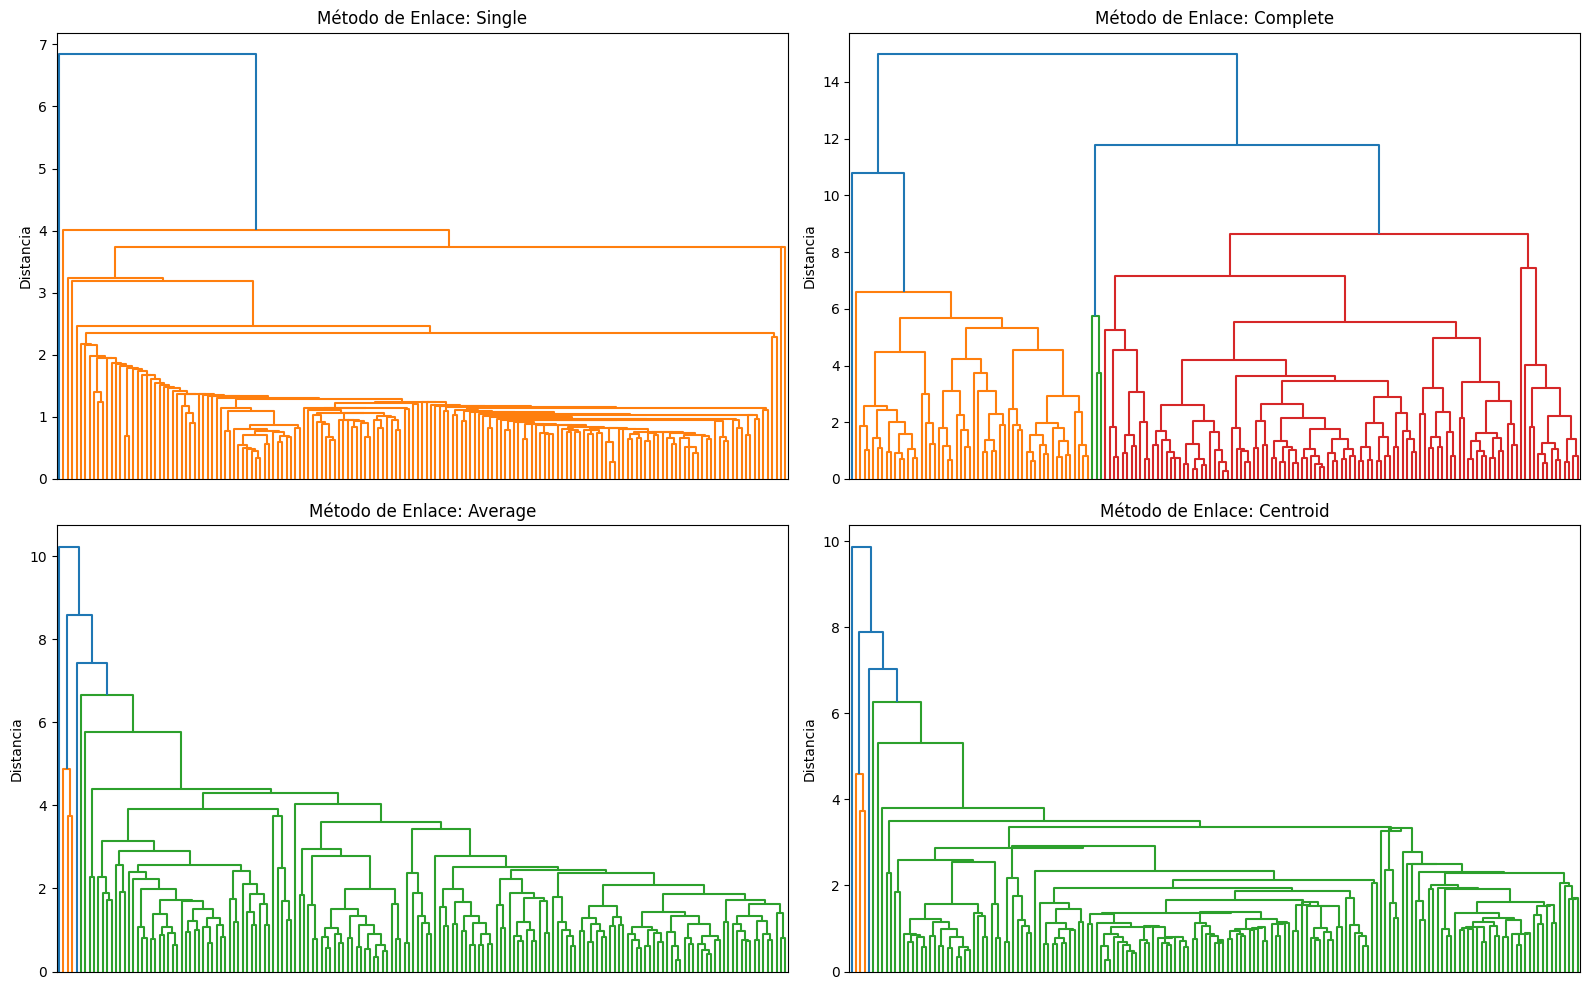

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

# Métodos de enlace
methods = ['single', 'complete', 'average', 'centroid']

for i, method in enumerate(methods):
    Z = linkage(df_scaled, method=method)
    dendrogram(Z,
        ax=axes[i],
        no_labels=True)
    axes[i].set_title(f'Método de Enlace: {method.capitalize()}')
    axes[i].set_ylabel('Distancia')

plt.tight_layout()
plt.show()


**- Toma una distancia de corte.**

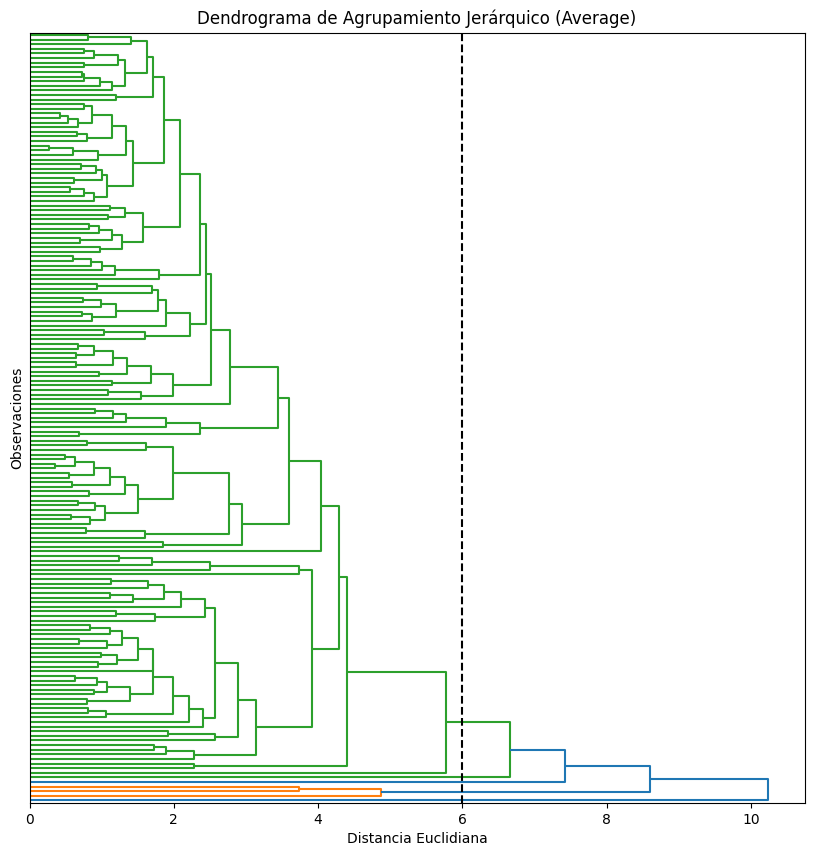

In [27]:
Z = linkage(df_scaled, method='average')

# Definir la distancia de corte
distancia_corte = 6

# Graficar dendrograma
plt.figure(figsize=(10, 10))
dendrogram(
    Z,
    orientation='right',
    no_labels=True)
plt.axvline(x=distancia_corte, color='k', linestyle='--')
plt.title("Dendrograma de Agrupamiento Jerárquico (Average)")
plt.xlabel("Distancia Euclidiana")
plt.ylabel("Observaciones")
plt.show()

**- De manera intutiva, ¿por qué tomaste la métrica y la distancia de corte?**

Esogí el agrupamiento jerarquico el de 'Average' con una distancia de corte de 6, porque en el dendograma se puede ver que hay un incrementeo significativo en la distancia de enlace a partit de ahí, (podría ser un 7 tamibién), y se puede identificar grupos bien diferenciados y no fusionando clusters con caracterísitcas socioeconómicas diferentes en este caso

---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

**- Asignar los grupos.**

In [29]:
clusters = fcluster(Z, t=distancia_corte, criterion='distance')

# Agregar etiqueta de cluster como C1, C2, ...
df_clusters = df.copy()
df_clusters['Cluster'] = ['C' + str(c) for c in clusters]

# Revisar los primeros registros
display(df_clusters.head())

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,C2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,C2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,C2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,C2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,C2


**- Revisar la media de cada grupo.**

In [30]:
# Cantidad de países por clúster
df_clusters['Cluster'].value_counts()

,count
Cluster,
C2,161
C1,3
C3,1
C5,1
C4,1


In [32]:
# Media de las variables cuantitativas por clúster
df_clusters.groupby('Cluster')[numeric_cols].mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
C1,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
C2,37.463975,38.722354,6.857453,45.060658,15772.751553,7.302683,70.598758,2.962298,11919.391304
C3,208.000000,15.300000,6.910000,64.700000,1500.000000,5.450000,32.100000,3.330000,662.000000
C4,9.000000,62.300000,1.810000,23.800000,125000.000000,6.980000,79.500000,2.070000,70300.000000
C5,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000


**- Revisa el mínimo y máximo de cada grupo.**

In [35]:
min_por_cluster = df_clusters.groupby('Cluster')[numeric_cols].min()
min_por_cluster

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
C1,2.8,153.000,3.96,142.0000,28300,-0.046,80.3,1.15,21100
C2,2.6,0.109,1.97,0.0659,609,-4.210,46.5,1.23,231
C3,208.0,15.300,6.91,64.7000,1500,5.450,32.1,3.33,662
C4,9.0,62.300,1.81,23.8000,125000,6.980,79.5,2.07,70300
C5,130.0,25.300,5.07,17.4000,5150,104.000,60.5,5.84,2330


In [36]:
max_por_cluster = df_clusters.groupby('Cluster')[numeric_cols].max()
max_por_cluster

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
C1,6.8,200.0,8.65,174.0,91700,3.83,82.7,1.63,105000
C2,160.0,103.0,17.90,108.0,80600,45.90,82.8,7.49,87800
C3,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
C4,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300
C5,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330


**- Mostrar algunos integrantes de cada grupo**

In [37]:
# Mostrar algunos países por cada clúster
for c in sorted(df_clusters['Cluster'].unique()):
    print(f"\nIntegrantes del {c}:")
    display(
        df_clusters[df_clusters['Cluster'] == c][['country']].head(5)
    )


Integrantes del C1:


,country
91,Luxembourg
98,Malta
133,Singapore



Integrantes del C2:


,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda



Integrantes del C3:


,country
66,Haiti



Integrantes del C4:


,country
123,Qatar



Integrantes del C5:


,country
113,Nigeria


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

**Tenemos 5 clústers:**

**- C2: Paises en desarrollo intermedio**

Tiene ingresos y PIB per cápita medios,tiene una mortalidad infantil moderada, y una esperanza de vida intermedia. Sus indicadores de salud y comercio está tipo relativamente equilibrados. Este grupo representa a mayoría de países que no presentan situaciones extremas, pero tampoco altos niveles de desarrollo

**- C1: Paises desarrollados**

Tienen ingresos y PIB muy altos, su tasa de mortalidad infantil es muy baja , tiene una alta esperanza de vida. Corresponden a países con alto nivel de desarrollo económico y social.

**- C3: Pais con condiciones críticas**

Tiene una mortalidad infantil muy alta, su esperanza de vida es muy baja y tienen bajos ingresos y estructura económica. Corresponde a países con condiciones socioeconómicas y salud deteriorads


**- C4: Pais con economía atípica**

Tiene indicadores relativamente altos, con un buen nivel de esperanza de vida. Este grupo representa una combinación particular de indicadores que lo separan del grupo principal, mostrando como un perfil económico singular

**- C5: Pais con crisis económica y social**

Tiene una inflación extremadamente alta, con una alta tasa de fertilidad, con bajos niveles de ingreso. Este grupo muestra una crisis económica severa, refejada en la inflación, junto con los problemas sociales y de salud



---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

In [38]:
# PCA a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

# DataFrame para graficar
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['country'] = df_clusters['country'].values
df_pca['Cluster'] = df_clusters['Cluster'].values

# Scatterplot interactivo
fig = px.scatter(
    df_pca,
    x='PC1',
    y='PC2',
    color='Cluster',
    hover_data=['country']
)

# Apariencia
fig.update_traces(marker=dict(opacity=0.8))
fig.update_layout(
    title='Visualización 2D de los Clústeres (PCA)',
    width=800,
    height=600
)

fig.show()


**- ¿Qué tan buenos te parecen los grupos?**

En el C2 aparece concentrado, aunque con cierta dispersión, el los C1, C3, C4 y C5 que tienen pocos países, aparecen aislados del grupo principal, por lo que se podría ver que este modelo sí logra identificar países con ocndiciones extremas, separándolos del resto

**- Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?**

In [39]:
pca.explained_variance_ratio_
pca.explained_variance_ratio_.sum()


np.float64(0.6313336543771411)

el PCA explica aproximadamente el 63.13% de la varainza total, lo que corresponde a la suma de la varianza explicada por la primera y segunda componente principal, sí afecta la vsualización  porque el restante, el 36.587% no está representada en el gráfico, lo que puede significar que haya superposición entre algunos clústeers en el grupo principal

---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

In [45]:
silhouette_vals = silhouette_samples(df_scaled, labels)

df_clusters['silueta'] = silhouette_vals

# Promedio de silueta por clúster
df_clusters.groupby('Cluster')['silueta'].mean()


,silueta
Cluster,
C1,0.397638
C2,0.392752
C3,0.000000
C4,0.000000
C5,0.000000


Con esta métrica muestra que los clústeres C1 Y C2 presentan aproximados a 0.39, casi 0.4, loq ue indica una calidad de agrupamiento moderada y una separación 'razonable' entre los grupos.

Los clústers C3, C4 y C5 representan un valor igual a 0 debido a que contienen un solo país, lo que significa los casos extremos claramente diferenciados.

En si creo que los resultados indican que el agrupamiento es adecuado para indicar ptrones generales y países con condiciones socioeconómicas y salud atípicas

---
## <font color='264CC7'> Iteraciones </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza el proceso de agrupamiento jerárquico con diferentes parámetros, analiza la métrica de la silueta de cada uno e indica cuál es el mejor.
</div>

In [46]:
methods = ['single', 'complete', 'average', 'centroid']
distancia_corte = 6

In [48]:
resultados = []

for method in methods:
    Z_iter = linkage(df_scaled, method=method)
    labels_iter = fcluster(Z_iter, t=distancia_corte, criterion='distance')

    sil = silhouette_score(df_scaled, labels_iter)

    resultados.append({
        'Metodo_enlace': method,
        'Silueta_promedio': sil,
        'Num_clusters': len(set(labels_iter))
    })

df_resultados = pd.DataFrame(resultados)
df_resultados

,Metodo_enlace,Silueta_promedio,Num_clusters
0,single,0.630338,2
1,complete,0.219198,8
2,average,0.385785,5
3,centroid,0.385785,5


El método que presentó valor más alto de la métrica de silueta fue el método single, este generó 2 clústers, y parecía tener un efecto de encadenmiento, lo que limitaróa su interpretabilidad. Los otros métodos averge y centroid tuvieron valores de silueta moderados, por ello se escogió el método avergae para dar como un 'equilibrio' entre la calidad del agrupamiento y número de clústeres